In [1]:
import pandas as pd
import sklearn.utils as skutils

In [2]:
df = pd.read_csv('Data-Collisions.csv')

/home/tasnima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Data Preprocessing

###Replace UNDERINFL column with proper values

In [3]:
df.replace({'UNDERINFL': {'0':'N', '1':'Y'}}, inplace=True)

In [4]:
###convert the type of this feature from object to numeric.

In [5]:
df['ST_COLCODE'] = pd.to_numeric(df['ST_COLCODE'], errors='coerce')

In [6]:
###Split INCDATE feature into three of types: 'YEAR', 'MONTH' and 'DAY'.

In [7]:
df['INCDATE'] = df['INCDATE'].str[:10]
df[['YEAR', 'MONTH', 'DAY']] = df['INCDATE'].str.split('/', expand=True)

###Downsample

In [8]:
df_prop_dam = df[df.SEVERITYCODE==1]
df_injury = df[df.SEVERITYCODE==2]

df_prop_dam_downsample = skutils.resample(df_prop_dam, 
                                         replace = False, 
                                         n_samples=df_injury['SEVERITYCODE'].count(), 
                                         random_state = 42)

df_downsample = pd.concat([df_prop_dam_downsample, df_injury])
df_downsample['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

###Upsample

In [9]:
df_prop_dam = df[df.SEVERITYCODE==1]
df_injury = df[df.SEVERITYCODE==2]

df_injury_upsampled = skutils.resample(df_injury,
                                       replace=True,
                                       n_samples=df_prop_dam['SEVERITYCODE'].count(),
                                       random_state=321)

df_upsample = pd.concat([df_prop_dam, df_injury_upsampled])
df_upsample['SEVERITYCODE'].value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

###Null Replace

>In default data

In [10]:
for column in df:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
INTKEY            0
LOCATION          0
EXCEPTRSNCODE     0
EXCEPTRSNDESC     0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SDOTCOLNUM        0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
YEAR              0
MONTH             0
DAY               0
dtype: int64

>In downsampled data

In [11]:
for column in df_downsample:
    if df_downsample[column].isnull().sum() > 0:
        df_downsample[column].fillna(df_downsample[column].mode()[0], inplace=True)
df_downsample.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
INTKEY            0
LOCATION          0
EXCEPTRSNCODE     0
EXCEPTRSNDESC     0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SDOTCOLNUM        0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
YEAR              0
MONTH             0
DAY               0
dtype: int64

>In upsampled data

In [12]:
for column in df_upsample:
    if df_upsample[column].isnull().sum() > 0:
        df_upsample[column].fillna(df_upsample[column].mode()[0], inplace=True)
df_upsample.isnull().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
INTKEY            0
LOCATION          0
EXCEPTRSNCODE     0
EXCEPTRSNDESC     0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SDOTCOLNUM        0
SPEEDING          0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
YEAR              0
MONTH             0
DAY               0
dtype: int64

##Feature Set

In [13]:
set_1 = ['COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'SEVERITYCODE']
set_2 = ['COLLISIONTYPE', 'PERSONCOUNT', 'JUNCTIONTYPE', 'SEVERITYCODE']
set_3 = ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 
         'UNDERINFL', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 
         'INCDATE', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 
         'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']
set_4 = ['COLLISIONTYPE', 'SEVERITYCODE']

In [14]:
###Encoding features of set_3

In [15]:
encoding_set_3 = ['UNDERINFL', 'HITPARKEDCAR', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

In [16]:
###Extend some splitted features of 'INCDATE'

In [17]:
set_3[:0] = ['YEAR', 'MONTH', 'DAY']
set_3.remove('INCDATE')

##Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

>Train test split along with One Hot Encoding

In [19]:
def split_data(dataset, columns_for_one_hot):
    X = dataset.iloc[:, :-1]
    Y = dataset.iloc[:, -1:]
    X = pd.get_dummies(X, columns=columns_for_one_hot, drop_first=True)
    print(X.head())
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)
    return X_train, X_test, y_train, y_test

###Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, X_test, y_train, y_test, solver='liblinear'):
    lr_classifier = LogisticRegression(solver=solver, random_state=42)
    
    lr_classifier.fit(X_train, y_train.values.ravel())
    
    y_pred = lr_classifier.predict(X_test)
    score = lr_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

####Data: Default, Feature Set: Set 3, Solver: liblinear

In [21]:
X_train, X_test, y_train, y_test = split_data(df[set_3], encoding_set_3)

train_logistic_regression(X_train, X_test, y_train, y_test)

   YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  SDOT_COLCODE  \
0  2013    03  27            2         0            0         2            11   
1  2006    12  20            2         0            0         2            16   
2  2004    11  18            4         0            0         3            14   
3  2013    03  29            3         0            0         3            11   
4  2004    01  28            2         0            0         2            11   

   ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  ROADCOND_Wet  \
0        10.0           0  ...                 0             1   
1        11.0           0  ...                 0             1   
2        32.0           0  ...                 0             0   
3        23.0           0  ...                 0             0   
4        10.0           0  ...                 0             1   

   LIGHTCOND_Dark - Street Lights Off  LIGHTCOND_Dark - Street Lights On  \
0                                   0   

In [22]:
####Data: Downsampled, Feature Set: Set 3, Solver: liblinear

In [23]:
X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], encoding_set_3)

train_logistic_regression(X_train, X_test, y_train, y_test)

        YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
8105    2004    07  31            2         0            0         2   
76753   2009    12  14            2         0            0         2   
113125  2012    06  26            2         0            0         2   
21423   2005    05  09            2         0            0         2   
24355   2005    03  22            2         0            0         2   

        SDOT_COLCODE  ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  \
8105              13        32.0           0  ...                 0   
76753             11        10.0           0  ...                 0   
113125            11        28.0           0  ...                 0   
21423             14        32.0           0  ...                 0   
24355             11        21.0           0  ...                 0   

        ROADCOND_Wet  LIGHTCOND_Dark - Street Lights Off  \
8105               0                                   0   
76753              1

####Data: Upsampled, Feature Set: Set 2, Solver: liblinear

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_2], ['COLLISIONTYPE', 'JUNCTIONTYPE'])

train_logistic_regression(X_train, X_test, y_train, y_test)

###Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier()
    
    rf_classifier.fit(X_train, y_train.values.ravel())
    
    y_pred = rf_classifier.predict(X_test)
    score = rf_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

#### Data: Default, Feature Set: Set 3

In [26]:
X_train, X_test, y_train, y_test = split_data(df[set_3], encoding_set_3)

train_random_forest(X_train, X_test, y_train, y_test)

   YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  SDOT_COLCODE  \
0  2013    03  27            2         0            0         2            11   
1  2006    12  20            2         0            0         2            16   
2  2004    11  18            4         0            0         3            14   
3  2013    03  29            3         0            0         3            11   
4  2004    01  28            2         0            0         2            11   

   ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  ROADCOND_Wet  \
0        10.0           0  ...                 0             1   
1        11.0           0  ...                 0             1   
2        32.0           0  ...                 0             0   
3        23.0           0  ...                 0             0   
4        10.0           0  ...                 0             1   

   LIGHTCOND_Dark - Street Lights Off  LIGHTCOND_Dark - Street Lights On  \
0                                   0   

/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.7322
ROC AUC Score: 0.6437

Confusion Matrix
[[23582  3730]
 [ 6696  4927]]

Classification Report
              precision    recall  f1-score   support

           1       0.78      0.86      0.82     27312
           2       0.57      0.42      0.49     11623

    accuracy                           0.73     38935
   macro avg       0.67      0.64      0.65     38935
weighted avg       0.72      0.73      0.72     38935



#### Data: Downsampled, Feature Set: Set 3

In [25]:
X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], encoding_set_3)

train_random_forest(X_train, X_test, y_train, y_test)

        YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
8105    2004    07  31            2         0            0         2   
76753   2009    12  14            2         0            0         2   
113125  2012    06  26            2         0            0         2   
21423   2005    05  09            2         0            0         2   
24355   2005    03  22            2         0            0         2   

        SDOT_COLCODE  ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  \
8105              13        32.0           0  ...                 0   
76753             11        10.0           0  ...                 0   
113125            11        28.0           0  ...                 0   
21423             14        32.0           0  ...                 0   
24355             11        21.0           0  ...                 0   

        ROADCOND_Wet  LIGHTCOND_Dark - Street Lights Off  \
8105               0                                   0   
76753              1

/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.6706
ROC AUC Score: 0.6709

Confusion Matrix
[[7984 3528]
 [4138 7626]]

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.69      0.68     11512
           2       0.68      0.65      0.67     11764

    accuracy                           0.67     23276
   macro avg       0.67      0.67      0.67     23276
weighted avg       0.67      0.67      0.67     23276



###SVM

In [ ]:
from sklearn.svm import SVC

def train_svm(X_train, X_test, y_train, y_test, kernel='rbf')
    svc_classifier = SVC(kernel=kernel)

    svc_classifier.fit(X_train, y_train)

    y_pred = svc_classifier.predict(X_test)
    score = svc_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

####Data: Upsampled, Feature Set: Set 1, Kernel: linear

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_1], ['COLLISIONTYPE'])

train_svm(X_train, X_test, y_train, y_test, 'linear')

####Data: Upsampled, Feature Set: Set 4, Kernel: linear

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_4], ['COLLISIONTYPE'])

train_svm(X_train, X_test, y_train, y_test, 'linear')

####Data: Upsampled, Feature Set: Set 1, Kernel: rbf

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_1], ['COLLISIONTYPE'])

train_svm(X_train, X_test, y_train, y_test)

####Data: Upsampled, Feature Set: Set 2, Kernel: rbf

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_2], ['COLLISIONTYPE', 'JUNCTIONTYPE'])

train_svm(X_train, X_test, y_train, y_test)

####Data: Upsampled, Feature Set: Set 4, Kernel: rbf

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_4], ['COLLISIONTYPE'])

train_svm(X_train, X_test, y_train, y_test)

###KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, X_test, y_train, y_test, n_neighbors=1):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    knn_classifier.fit(X_train, y_train.values.ravel())
    
    y_pred = knn_classifier.predict(X_test)
    score = knn_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))
    
    return score, roc_score

#### Best K selection

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def k_selection(dataset, columns_for_one_hot, k_max=50):
    acc = []
    roc_auc = []
    for i in range(1, k_max+1):
        X_train, X_test, y_train, y_test = split_data(dataset, columns_for_one_hot)
        accuracy_score, roc_auc_score = train_knn(X_train, X_test, y_train, y_test, n_neighbors=i)

        acc.append(accuracy_score)
        roc_auc.append(roc_auc_score)

    acc = np.array(acc)
    roc_auc = np.array(roc_auc)
    print('Best k: {} for best accuracy: {}'.format(acc.argmax()+1, acc.max()))
    print('Best k: {} for best roc auc score: {}'.format(roc_auc.argmax()+1, roc_auc.max()))
    
    # Plotting 'Accuracy and Roc Auc Score Vs Number of Neighbors'
    
    plt.figure(figsize=(10, 5))  
    plt.plot(range(1, k_max+1), acc)
    plt.plot(range(1, k_max+1), roc_auc, 'o')
    plt.xlabel('Number of Neighbors')
    plt.legend(["accuracy", "roc auc score"], loc ="lower right")
    plt.show()
    
    return roc_auc.argmax()+1

#### Data: Downsampled, Feature Set: Set 3, n_neighbors: best_k

        YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
8105    2004    07  31            2         0            0         2   
76753   2009    12  14            2         0            0         2   
113125  2012    06  26            2         0            0         2   
21423   2005    05  09            2         0            0         2   
24355   2005    03  22            2         0            0         2   

        SDOT_COLCODE  ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  \
8105              13        32.0           0  ...                 0   
76753             11        10.0           0  ...                 0   
113125            11        28.0           0  ...                 0   
21423             14        32.0           0  ...                 0   
24355             11        21.0           0  ...                 0   

        ROADCOND_Wet  LIGHTCOND_Dark - Street Lights Off  \
8105               0                                   0   
76753              1

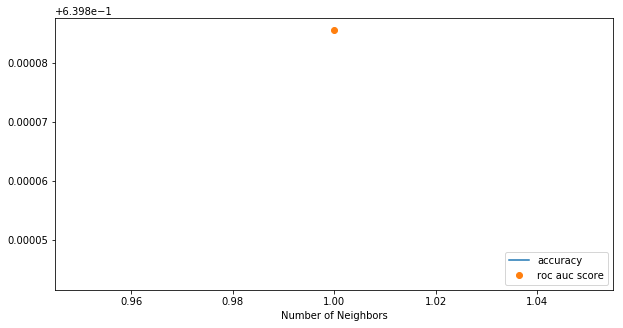

        YEAR MONTH DAY  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
8105    2004    07  31            2         0            0         2   
76753   2009    12  14            2         0            0         2   
113125  2012    06  26            2         0            0         2   
21423   2005    05  09            2         0            0         2   
24355   2005    03  22            2         0            0         2   

        SDOT_COLCODE  ST_COLCODE  SEGLANEKEY  ...  ROADCOND_Unknown  \
8105              13        32.0           0  ...                 0   
76753             11        10.0           0  ...                 0   
113125            11        28.0           0  ...                 0   
21423             14        32.0           0  ...                 0   
24355             11        21.0           0  ...                 0   

        ROADCOND_Wet  LIGHTCOND_Dark - Street Lights Off  \
8105               0                                   0   
76753              1

(0.6398436157415364, 0.6398855951857458)

In [22]:
best_k = k_selection(df_downsample[set_3], encoding_set_3, k_max=1)

X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], encoding_set_3)

train_knn(X_train, X_test, y_train, y_test, n_neighbors=best_k)

#### Data: Upsampled, Feature Set: Set 2, n_neighbors: best_k

In [ ]:
best_k = k_selection(df_upsample[set_2], ['COLLISIONTYPE', 'JUNCTIONTYPE'], k_max=2)

X_train, X_test, y_train, y_test = split_data(df_upsample[set_2], ['COLLISIONTYPE', 'JUNCTIONTYPE'])

train_knn(X_train, X_test, y_train, n_neighbors=best_k)

        PERSONCOUNT_1  PERSONCOUNT_2  ...  LIGHTCOND_Other  LIGHTCOND_Unknown
8105                0              1  ...                0                  1
76753               0              1  ...                0                  0
113125              0              1  ...                0                  0
21423               0              1  ...                0                  0
24355               0              1  ...                0                  0

[5 rows x 10182 columns]
Train set: (93100, 10182) (93100, 1)
Test set: (23276, 10182) (23276, 1)


###ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def train_ada_boost(X_train, X_test, y_train, y_test)
    ada_boost_classifier = AdaBoostClassifier()

    ada_boost_classifier.fit(X_train, y_train)

    y_pred = ada_boost_classifier.predict(X_test)
    score = ada_boost_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

####Data: Upsampled, Feature Set: Set 1

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_1], ['COLLISIONTYPE'])

train_ada_boost(X_train, X_test, y_train, y_test)

####Data: Upsampled, Feature Set: Set 4

In [ ]:
X_train, X_test, y_train, y_test = split_data(df_upsample[set_4], ['COLLISIONTYPE'])

train_ada_boost(X_train, X_test, y_train, y_test)